In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

import warnings
warnings.filterwarnings('ignore')


Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.



In [2]:
df = pd.read_excel("Election_Data (1).xlsx",sheet_name='Election_Dataset_Two Classes')


**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.shape

(1525, 10)

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
df["vote"].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

Most of the People had Voted for Labour than conservative

In [8]:
df["economic.cond.national"].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [9]:
df["economic.cond.household"].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [10]:
df["Blair"].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [11]:
df["Hague"].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [12]:
df["Europe"].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [13]:
df["political.knowledge"].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [14]:
df["gender"].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


On the basis of the Observation, we can clearly sees that expect Vote and gender all other variable are in Numerical and Integer.We can  convert the All the Object into categorical

In [16]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

No Missing value present in the Data. Hence there is missing 0s present in the Varaible.As only Vote and gender are Categorically after verifying those category we can say that no bad data present in the Data 


In [17]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


There is no Anomolies present in the Data 

In [18]:
df.duplicated().sum()

8

In [19]:
df=df.drop_duplicates()

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(1517, 9)

Total of 8 duplicates present in the data and all the 8 duplicates has been removed. Now the size of data has been reduced to (1517,9)

Now the Data cleaning of has almost completed.Now we can Analysis the data using Univariate,Bi-variate and Multi Variate Analysis.Before that we can covert those categorical Value of Vote and gender into the Numerical one 

In [22]:
df["vote"].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [23]:
df['vote'].replace(['Labour', 'Conservative'],
                        [0, 1], inplace=True)

In [24]:
df["vote"].value_counts()

0    1057
1     460
Name: vote, dtype: int64

Now the labour is converted into 0 and conservative as 1

In [25]:
df["gender"].value_counts()

female    808
male      709
Name: gender, dtype: int64

In [26]:
df['gender'].replace(['female', 'male'],
                        [0, 1], inplace=True)

In [27]:
df["gender"].value_counts()

0    808
1    709
Name: gender, dtype: int64

Now the female has been converted 0 where as males is converted to 1

In [28]:
df.skew()

vote                       0.857014
age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
gender                     0.130929
dtype: float64

### Data Visualization


#### Univariate Analysis


In [29]:
df.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.303230,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541,0.467370
std,0.459805,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417,0.499099
min,0.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000
50%,0.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,0.000000
75%,1.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000
max,1.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000


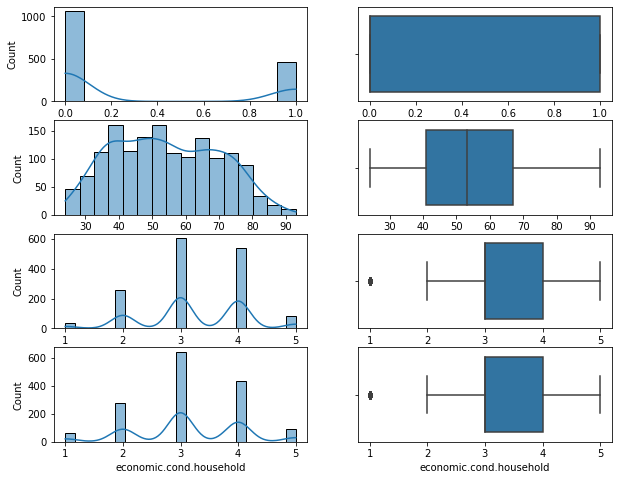

In [30]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['vote'], kde=True, ax=axes[0][0])
sns.boxplot(x='vote', data=df, ax=axes[0][1])
sns.histplot(df['age'] , kde=True, ax=axes[1][0])
sns.boxplot(x='age', data=df , ax=axes[1][1])
sns.histplot(df['economic.cond.national'] , kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.national', data=df , ax=axes[2][1])
sns.histplot(df['economic.cond.household'] , kde=True, ax=axes[3][0])
sns.boxplot(x='economic.cond.household', data=df , ax=axes[3][1])
plt.show()

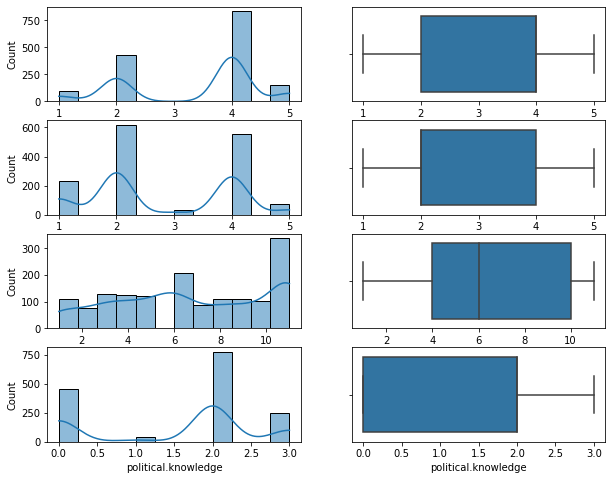

In [31]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['Blair'], kde=True, ax=axes[0][0])
sns.boxplot(x='Blair', data=df, ax=axes[0][1])
sns.histplot(df['Hague'] , kde=True, ax=axes[1][0])
sns.boxplot(x='Hague', data=df , ax=axes[1][1])
sns.histplot(df['Europe'] , kde=True, ax=axes[2][0])
sns.boxplot(x='Europe', data=df , ax=axes[2][1])
sns.histplot(df['political.knowledge'] , kde=True, ax=axes[3][0])
sns.boxplot(x='political.knowledge', data=df , ax=axes[3][1])
plt.show()

In [32]:
df.head(1)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0


0    1057
1     460
Name: vote, dtype: int64

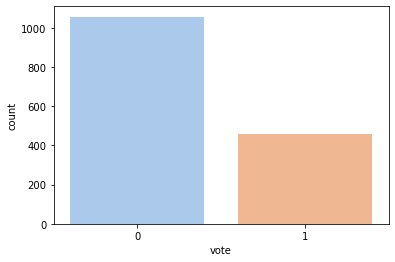

In [33]:
sns.countplot(x='vote', data=df, palette='pastel')
df["vote"].value_counts()

Here Labour represent the Numerical Value of '0'and conservative represent the numerical value of '1'

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

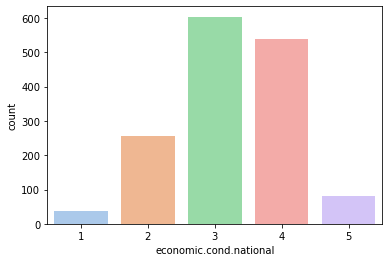

In [34]:
sns.countplot(x='economic.cond.national', data=df, palette='pastel')
df["economic.cond.national"].value_counts()

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

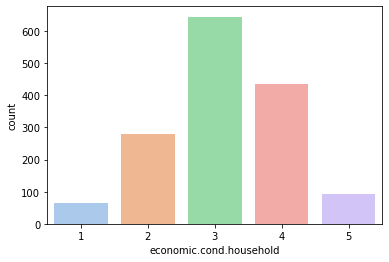

In [35]:
sns.countplot(x='economic.cond.household', data=df, palette='pastel')
df["economic.cond.household"].value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

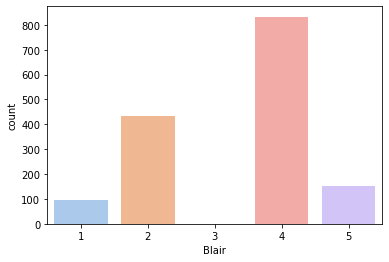

In [36]:
sns.countplot(x='Blair', data=df, palette='pastel')
df["Blair"].value_counts()

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

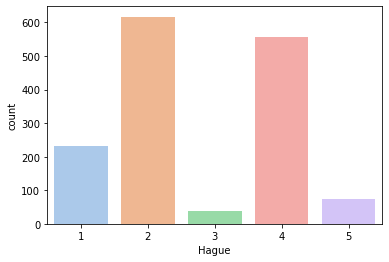

In [37]:
sns.countplot(x='Hague', data=df, palette='pastel')
df["Hague"].value_counts()

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

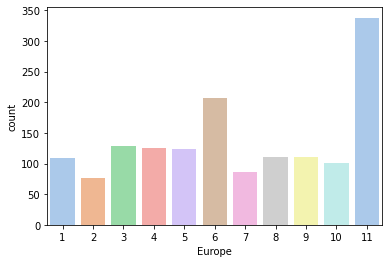

In [38]:
sns.countplot(x='Europe', data=df, palette='pastel')
df["Europe"].value_counts()

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

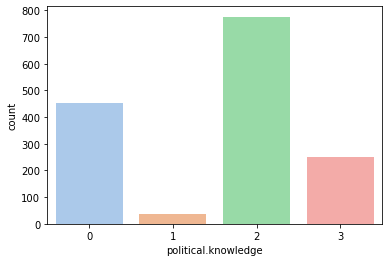

In [39]:
sns.countplot(x='political.knowledge', data=df, palette='pastel')
df["political.knowledge"].value_counts()

0    808
1    709
Name: gender, dtype: int64

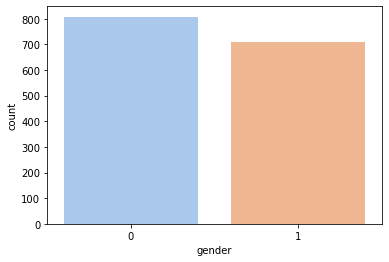

In [40]:
sns.countplot(x='gender', data=df, palette='pastel')
df["gender"].value_counts()

<AxesSubplot:xlabel='age', ylabel='vote'>

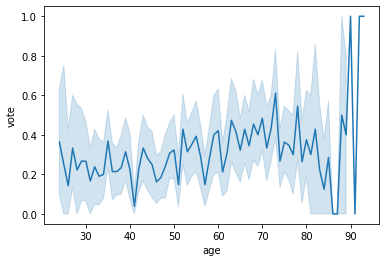

In [41]:
sns.lineplot(x='age',y='vote',data=df)

<AxesSubplot:xlabel='Hague', ylabel='age'>

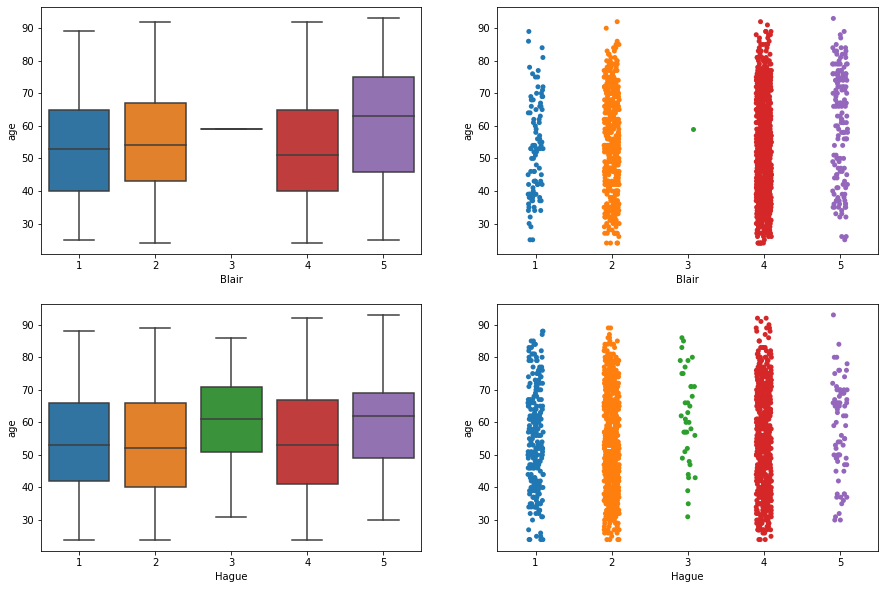

In [42]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
sns.boxplot(df["Blair"],df["age"], ax = axes[0][0])
sns.stripplot(df["Blair"],df["age"], ax = axes[0][1])
sns.boxplot(df["Hague"],df["age"], ax = axes[1][0])
sns.stripplot(df["Hague"],df["age"], ax = axes[1][1])


In [43]:
df[df['age']>90]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
131,1,92,3,3,4,4,8,2,0
354,1,92,3,3,2,4,6,0,0
1142,1,93,4,4,5,5,6,2,0
1291,0,91,4,3,4,4,2,3,1


In [44]:
df[df['age']>85]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
72,1,88,3,3,4,4,11,0,0
118,0,89,4,3,4,4,4,2,0
131,1,92,3,3,4,4,8,2,0
181,1,90,4,4,2,4,11,3,0
276,0,88,3,3,4,1,6,0,0
354,1,92,3,3,2,4,6,0,0
388,0,86,3,3,4,2,11,0,1
444,0,88,4,4,5,1,10,0,0
573,1,89,2,2,1,4,1,0,1
625,1,88,4,2,4,4,2,0,0


Here Female represent the Numerical Value of '0'and Male represent the numerical value of '1'

In [45]:
df.head(1)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0


<AxesSubplot:xlabel='vote', ylabel='age'>

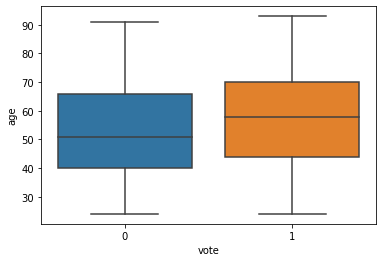

In [46]:
fig_dims = (12, 5)
sns.boxplot(x='vote', y='age', data=df)

<AxesSubplot:xlabel='vote', ylabel='Hague'>

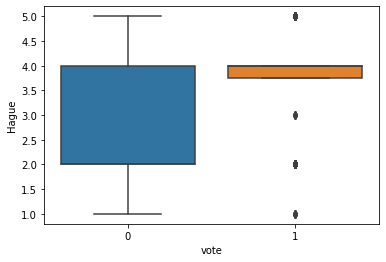

In [47]:
fig_dims = (12, 5)
sns.boxplot(x='vote', y='Hague', data=df)

<AxesSubplot:xlabel='vote', ylabel='Europe'>

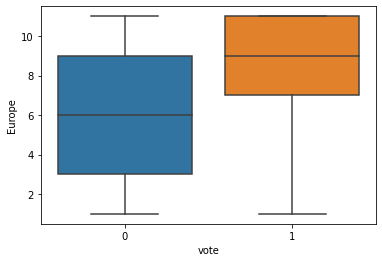

In [48]:
fig_dims = (12, 5)
sns.boxplot(x='vote', y='Europe', data=df)

<AxesSubplot:xlabel='vote', ylabel='political.knowledge'>

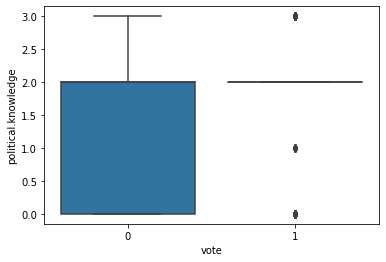

In [49]:
fig_dims = (12, 5)
sns.boxplot(x='vote', y='political.knowledge', data=df)

In [50]:
df.head(1)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0


<AxesSubplot:xlabel='vote', ylabel='economic.cond.national'>

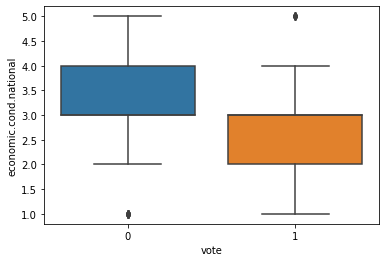

In [51]:
fig_dims = (12, 5)
sns.boxplot(x='vote', y='economic.cond.national', data=df)

<AxesSubplot:xlabel='vote', ylabel='economic.cond.household'>

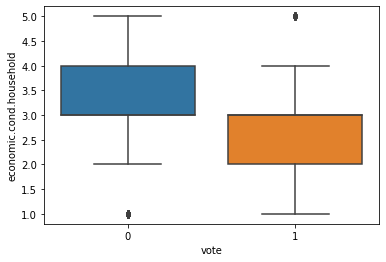

In [52]:
fig_dims = (12, 5)
sns.boxplot(x='vote', y='economic.cond.household', data=df)

<AxesSubplot:xlabel='Blair', ylabel='Count'>

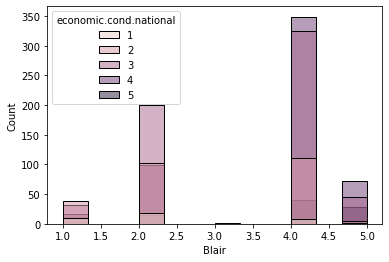

In [53]:
sns.histplot(data =df , x = "Blair", hue = "economic.cond.national")


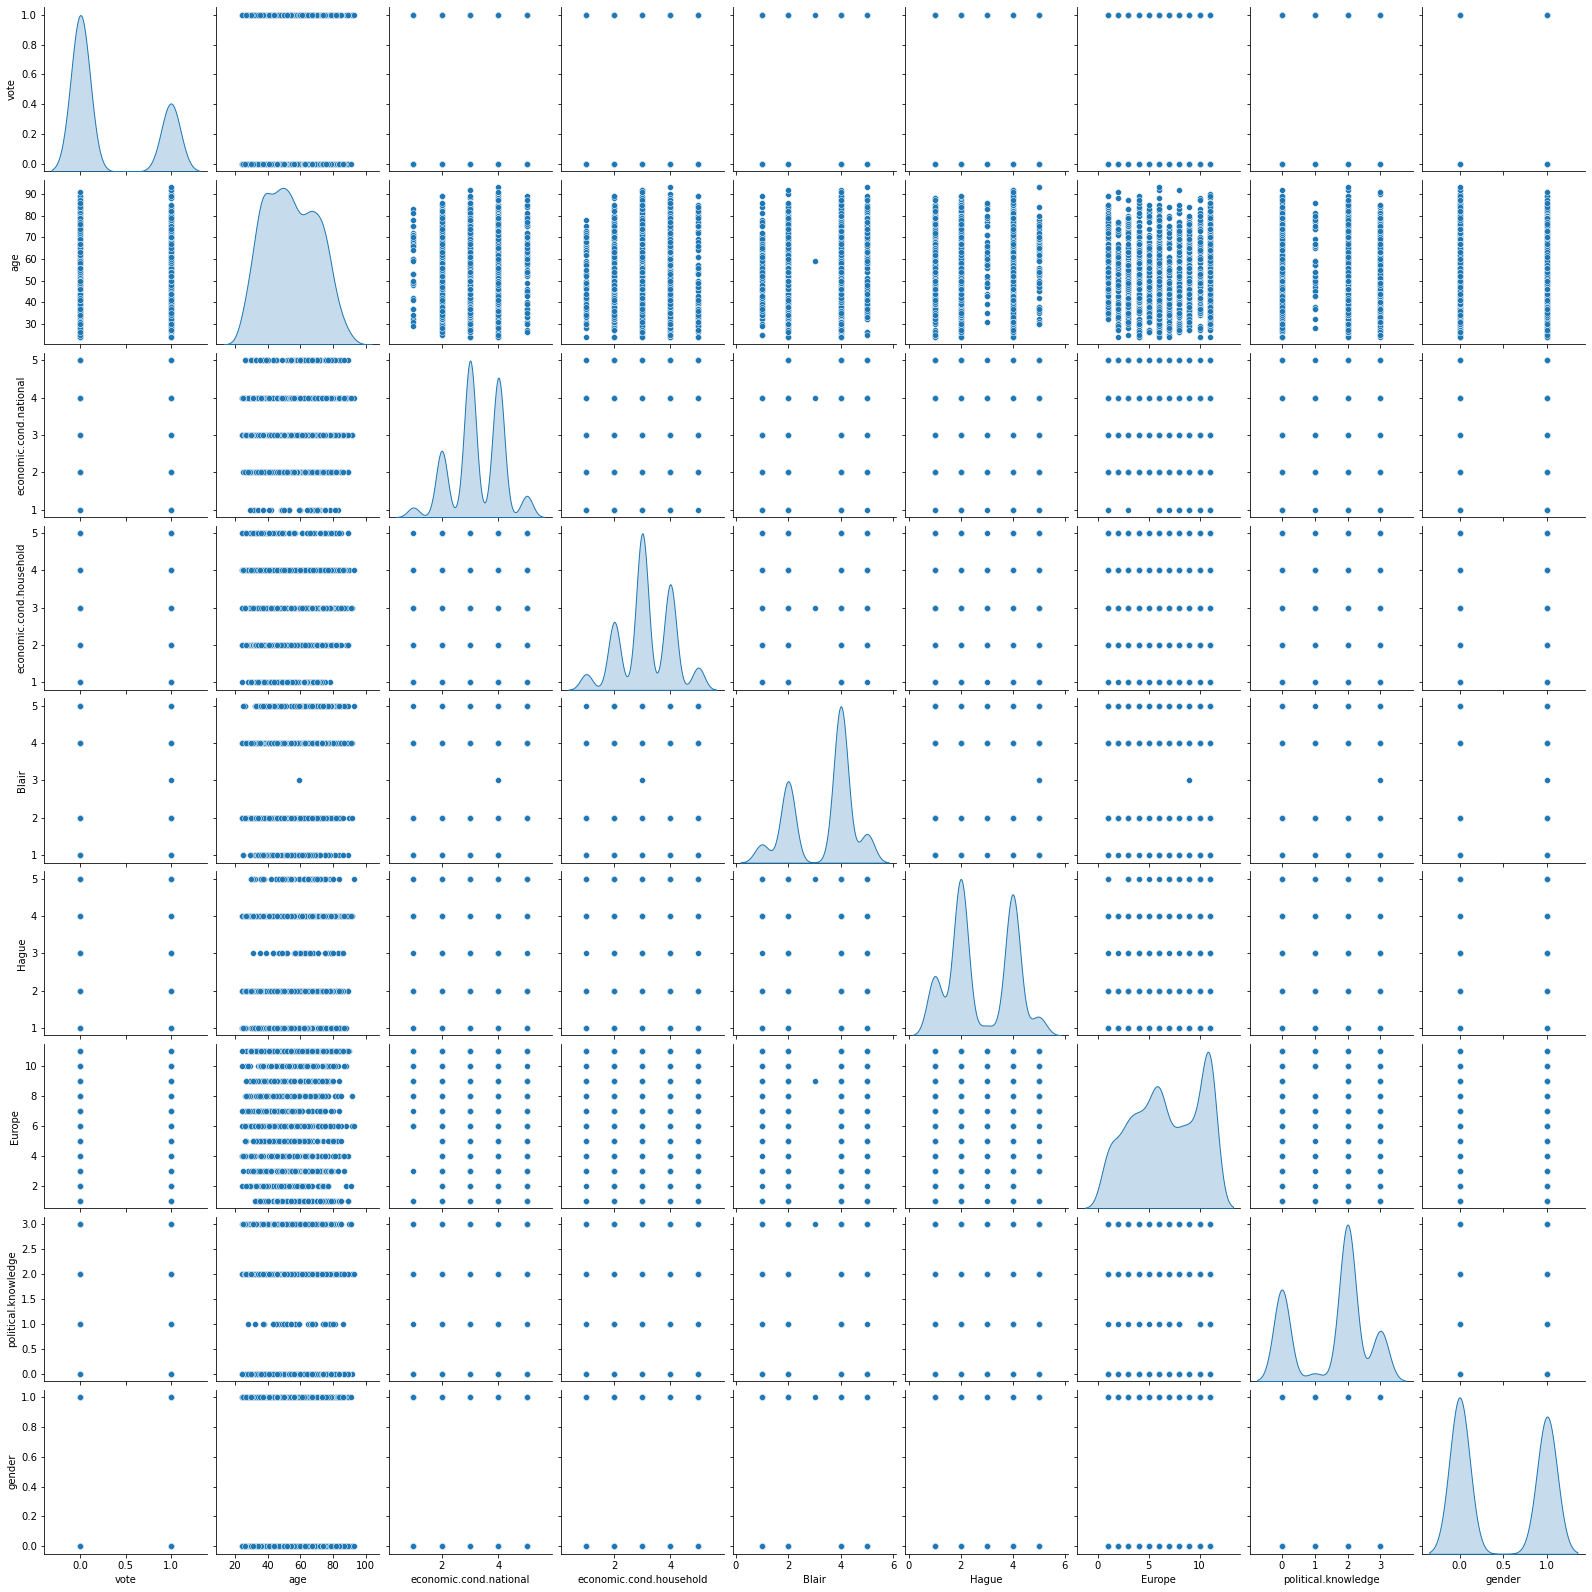

In [54]:
sns.pairplot(df, diag_kind="kde")

In [55]:
df.corr()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,1.000000,0.109274,-0.302280,-0.174688,-0.426606,0.468186,0.384612,0.111589,-0.034464
age,0.109274,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598,-0.017933
economic.cond.national,-0.302280,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510,0.055664
economic.cond.household,-0.174688,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528,0.033102
Blair,-0.426606,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299,0.067624
Hague,0.468186,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906,-0.028309
Europe,0.384612,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197,-0.076059
political.knowledge,0.111589,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000,0.156923
gender,-0.034464,-0.017933,0.055664,0.033102,0.067624,-0.028309,-0.076059,0.156923,1.000000


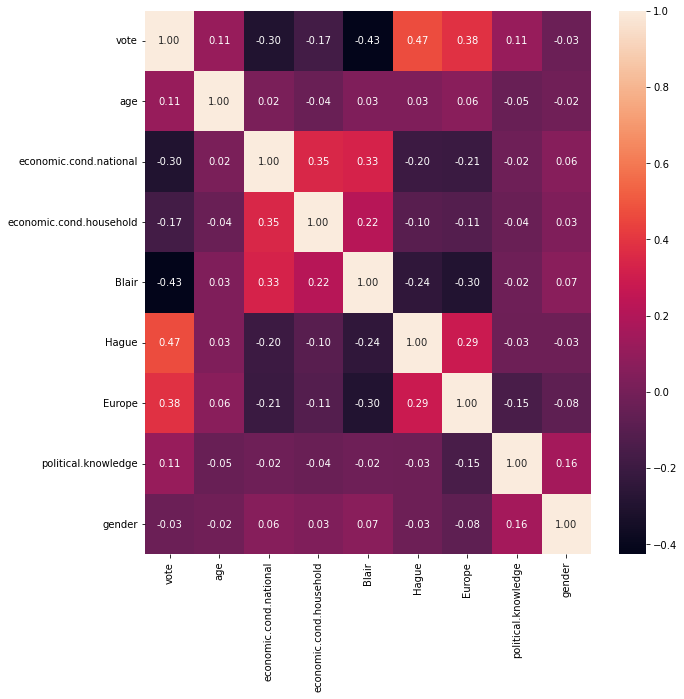

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

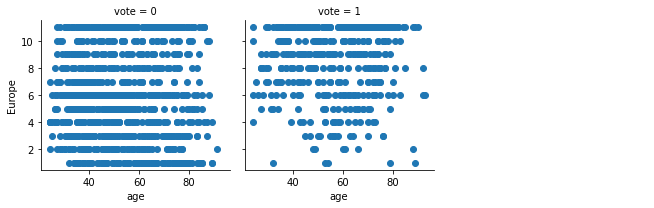

In [57]:
g = sns.FacetGrid(df, col="vote",col_wrap=3, height=3)
g = g.map(plt.scatter, "age", 'Europe')
g.add_legend()

<AxesSubplot:>

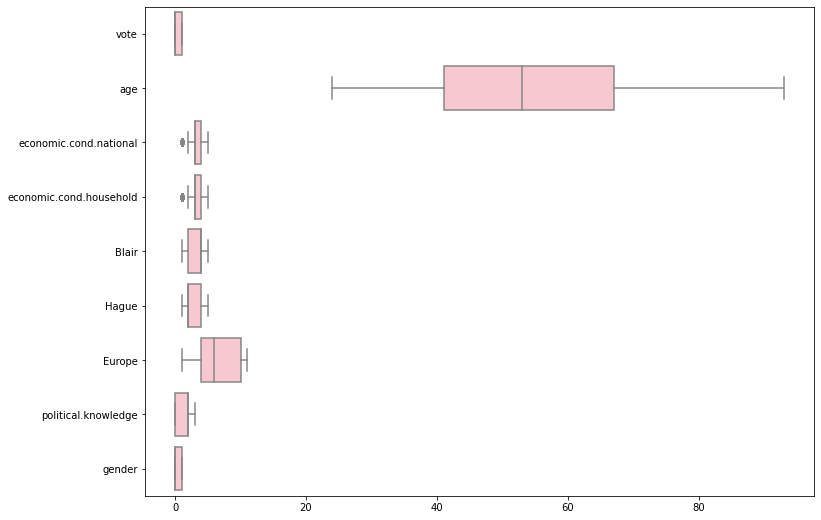

In [58]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df,orient='horizondal',color='pink')


In [133]:
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1
5,0,47,3,4,4,4,4,2,1
6,0,57,2,2,4,4,11,2,1
7,0,77,3,4,4,1,1,0,1
8,0,39,3,3,4,4,11,0,0
9,0,70,3,2,5,1,11,2,1


In [60]:
from scipy.stats import zscore
df_1=df.apply(zscore)

We can clearly see that there is No outlier present in the data. Even the Age which has countinuos data dont have any such outliers 

In [134]:
df_1.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.659692,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-0.659692,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-0.659692,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-0.659692,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.659692,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [135]:
df_1.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03
mean,-1.305628e-16,1.917458e-17,-1.984789e-16,-2.397189e-16,-1.034842e-16,5.386448e-17,6.293947e-17,-7.665442e-16,2.648581e-16
std,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00,1.000330e+00
min,-6.596923e-01,-1.926617e+00,-2.547041e+00,-2.296796e+00,-1.988727e+00,-1.419969e+00,-1.740556e+00,-1.421084e+00,-9.367365e-01
25%,-6.596923e-01,-8.435773e-01,-2.781853e-01,-1.480205e-01,-1.137217e+00,-6.083289e-01,-8.309016e-01,-1.421084e+00,-9.367365e-01
50%,-6.596923e-01,-7.907881e-02,-2.781853e-01,-1.480205e-01,5.658022e-01,-6.083289e-01,-2.244654e-01,4.238322e-01,-9.367365e-01
75%,1.515858e+00,8.128361e-01,8.562424e-01,9.263674e-01,5.658022e-01,1.014951e+00,9.884072e-01,4.238322e-01,1.067536e+00
max,1.515858e+00,2.469250e+00,1.990670e+00,2.000755e+00,1.417312e+00,1.826592e+00,1.291625e+00,1.346290e+00,1.067536e+00


In [61]:
# independent variables
X = df.drop(["vote"], axis=1)
# dependent variable
y = df[["vote"]]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [139]:
X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
991,34,2,4,1,4,11,2,0
1274,40,4,3,4,4,6,0,1
649,61,4,3,4,4,7,2,0
677,47,3,3,4,2,11,0,1
538,44,5,3,4,2,8,0,1
...,...,...,...,...,...,...,...,...
717,52,3,3,4,1,6,2,0
908,43,3,4,2,2,9,2,0
1100,74,4,3,5,4,11,0,0
236,31,3,3,2,3,6,0,0


In [140]:
X_train.shape

(1061, 8)

In [141]:
X_test

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
504,71,3,3,2,2,8,2,0
369,43,3,2,4,2,8,3,1
1075,89,5,5,5,2,1,2,1
1031,47,2,3,2,4,8,2,0
1329,33,5,4,4,4,8,0,1
...,...,...,...,...,...,...,...,...
562,37,4,2,4,2,8,1,1
928,42,2,2,1,2,7,2,0
276,88,3,3,4,1,6,0,0
1128,53,4,3,4,2,10,0,0


In [142]:
X_test.shape

(456, 8)

In [143]:
y_train

,vote
991,1
1274,0
649,1
677,0
538,0
...,...
717,0
908,1
1100,0
236,0


In [144]:
y_train.shape

(1061, 1)

In [145]:
y_test

,vote
504,0
369,0
1075,0
1031,1
1329,0
...,...
562,0
928,0
276,0
1128,0


In [146]:
y_test.shape

(456, 1)

# LOGISTIC REGRESSION 

In [147]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [148]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [149]:
y_test_predict_prob=model.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,0.576838,0.423162
1,0.855354,0.144646
2,0.994234,0.005766
3,0.155411,0.844589
4,0.938538,0.061462


In [150]:
model.score(X_train, y_train)

0.8350612629594723

In [151]:
model.score(X_test, y_test)

0.8267543859649122

In [152]:
print(classification_report(y_train ,y_train_predict))


              precision    recall  f1-score   support

           0       0.87      0.91      0.89       754
           1       0.75      0.65      0.70       307

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



AxesSubplot(0.125,0.125;0.62x0.755)


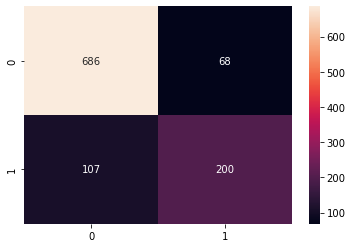

In [153]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))


In [154]:
print(classification_report(y_test ,y_test_predict))


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       303
           1       0.75      0.72      0.74       153

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



AxesSubplot(0.125,0.125;0.62x0.755)


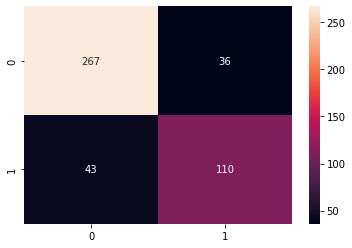

In [155]:
print(sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True , fmt="2g"))


AUC: 0.890


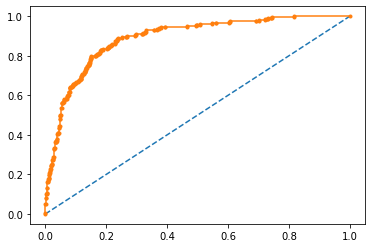

In [156]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.879


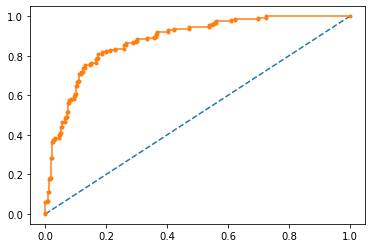

In [157]:
# AUC and ROC for the test data

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# LINEAR DISCRIMINANT ANALYSIS 

In [160]:
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [159]:
clfLDA.score(X_train, y_train)

0.8341187558906692

In [76]:
clfLDA.score(X_test, y_test)

0.8333333333333334

In [77]:
print(confusion_matrix(clfLDA.predict(X_train),y_train))


[[685 107]
 [ 69 200]]


In [78]:
print(classification_report(clfLDA.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       792
           1       0.65      0.74      0.69       269

    accuracy                           0.83      1061
   macro avg       0.78      0.80      0.79      1061
weighted avg       0.84      0.83      0.84      1061



In [79]:
print(confusion_matrix(clfLDA.predict(X_test),y_test))


[[269  42]
 [ 34 111]]


In [80]:
print(classification_report(clfLDA.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       311
           1       0.73      0.77      0.74       145

    accuracy                           0.83       456
   macro avg       0.81      0.82      0.81       456
weighted avg       0.84      0.83      0.83       456



AUC: 0.889


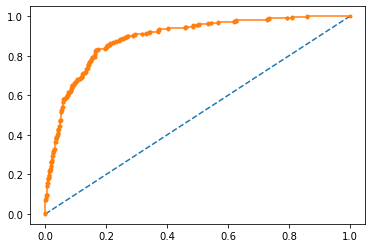

In [81]:
# AUC and ROC for the training data

# predict probabilities
probs = clfLDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot


AUC: 0.888


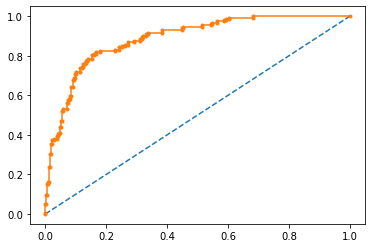

In [82]:
# AUC and ROC for the test data

# predict probabilities
probs = clfLDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [83]:
clfLDA.score(X_train, y_train)

0.8341187558906692

In [84]:
clfLDA.score(X_test, y_test)

0.8333333333333334

# **Gaussian Naive Bayes**

In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [86]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [87]:
NB_model.score(X_train, y_train)

0.8350612629594723

In [88]:
NB_model.score(X_test, y_test)

0.8223684210526315

In [89]:
print(confusion_matrix(NB_model.predict(X_train),y_train))


[[675  96]
 [ 79 211]]


In [90]:
print(classification_report(NB_model.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       771
           1       0.69      0.73      0.71       290

    accuracy                           0.84      1061
   macro avg       0.79      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [91]:
print(confusion_matrix(NB_model.predict(X_test),y_test))


[[263  41]
 [ 40 112]]


In [92]:
print(classification_report(NB_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       304
           1       0.73      0.74      0.73       152

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.888


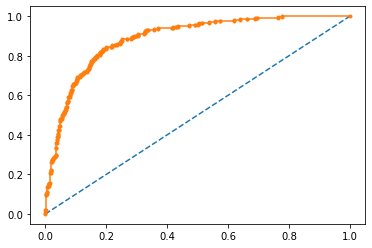

In [93]:
# AUC and ROC for the training data

# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot


AUC: 0.876


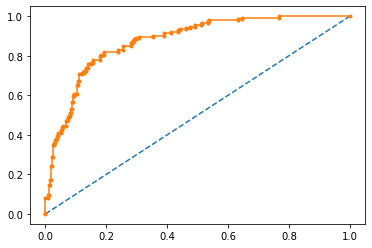

In [94]:
# AUC and ROC for the test data

# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# KNN Model

In [95]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [96]:
KNN_model.score(X_train, y_train)

0.8623939679547596

In [97]:
KNN_model.score(X_test, y_test)

0.8201754385964912

In [98]:
print(confusion_matrix(KNN_model.predict(X_train),y_train))


[[705  97]
 [ 49 210]]


In [99]:
print(classification_report(KNN_model.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       802
           1       0.68      0.81      0.74       259

    accuracy                           0.86      1061
   macro avg       0.81      0.84      0.82      1061
weighted avg       0.87      0.86      0.87      1061



In [100]:
print(confusion_matrix(KNN_model.predict(X_test),y_test))


[[274  53]
 [ 29 100]]


In [101]:
print(classification_report(KNN_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       327
           1       0.65      0.78      0.71       129

    accuracy                           0.82       456
   macro avg       0.78      0.81      0.79       456
weighted avg       0.83      0.82      0.82       456



AUC: 0.926


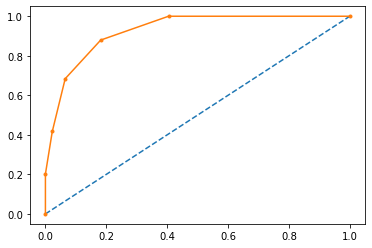

In [102]:
# AUC and ROC for the training data

# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot


AUC: 0.856


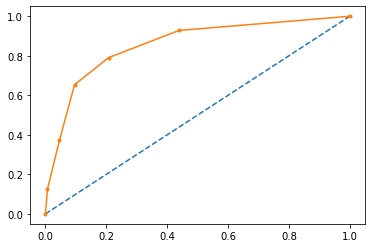

In [103]:
# AUC and ROC for the test data

# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# BAGGING MODEL

# Random Forest

In [193]:
RF_model=RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [194]:
RF_model.score(X_train,y_train)

1.0

In [195]:
RF_model.score(X_test,y_test)

0.8333333333333334

In [196]:
print(confusion_matrix(RF_model.predict(X_train),y_train))


[[754   0]
 [  0 307]]


In [197]:
print(classification_report(RF_model.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [198]:
print(confusion_matrix(RF_model.predict(X_test),y_test))


[[278  51]
 [ 25 102]]


In [199]:
print(classification_report(RF_model.predict(X_test),y_test))


              precision    recall  f1-score   support

           0       0.92      0.84      0.88       329
           1       0.67      0.80      0.73       127

    accuracy                           0.83       456
   macro avg       0.79      0.82      0.80       456
weighted avg       0.85      0.83      0.84       456



AUC: 1.000


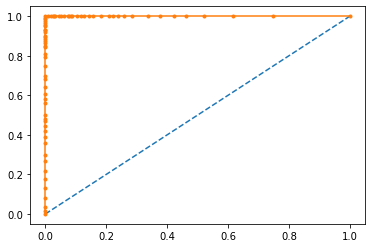

In [200]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot


AUC: 0.890


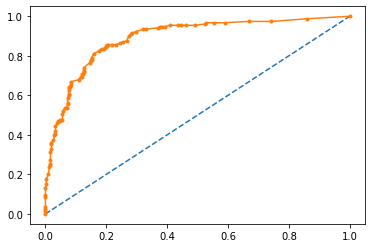

In [201]:
# AUC and ROC for the test data

# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [202]:

Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [203]:
Bagging_model.score(X_train,y_train)

0.9679547596606974

In [204]:
Bagging_model.score(X_test,y_test)

0.8289473684210527

In [116]:
print(confusion_matrix(Bagging_model.predict(X_train),y_train))


[[750  30]
 [  4 277]]


In [117]:
print(classification_report(Bagging_model.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       780
           1       0.90      0.99      0.94       281

    accuracy                           0.97      1061
   macro avg       0.95      0.97      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [118]:
print(confusion_matrix(Bagging_model.predict(X_test),y_test))


[[274  49]
 [ 29 104]]


In [119]:
print(classification_report(Bagging_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       323
           1       0.68      0.78      0.73       133

    accuracy                           0.83       456
   macro avg       0.79      0.82      0.80       456
weighted avg       0.84      0.83      0.83       456



AUC: 0.997


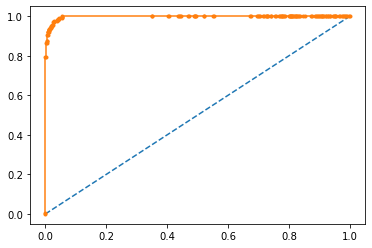

In [120]:
# AUC and ROC for the training data

# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot


AUC: 0.897


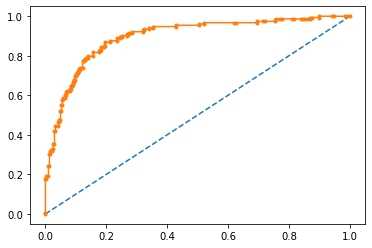

In [121]:
# AUC and ROC for the test data

# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# Ada Boost

In [122]:
ADB_model = AdaBoostClassifier()
ADB_model.fit(X_train,y_train)

AdaBoostClassifier()

In [123]:
ADB_model.score(X_train,y_train)

0.8463713477851084

In [124]:
ADB_model.score(X_test,y_test)

0.8135964912280702

In [125]:
print(confusion_matrix(ADB_model.predict(X_train),y_train))


[[688  97]
 [ 66 210]]


In [126]:
print(classification_report(ADB_model.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       785
           1       0.68      0.76      0.72       276

    accuracy                           0.85      1061
   macro avg       0.80      0.82      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [127]:
print(confusion_matrix(ADB_model.predict(X_test),y_test))


[[266  48]
 [ 37 105]]


In [128]:
print(classification_report(ADB_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       314
           1       0.69      0.74      0.71       142

    accuracy                           0.81       456
   macro avg       0.78      0.79      0.79       456
weighted avg       0.82      0.81      0.82       456



AUC: 0.912


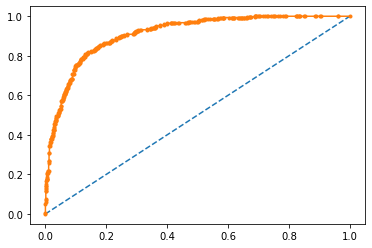

In [129]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot


AUC: 0.881


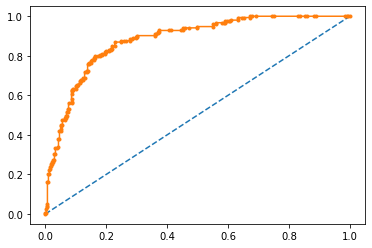

In [130]:
# AUC and ROC for the test data

# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [206]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}


In [217]:
ADB_model=AdaBoostClassifier()


In [218]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)


In [219]:
ADB_model_grid=grid_search.fit(X_train,y_train)


In [220]:
grid_search.best_estimator_


AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [221]:
y_train_predict = ADB_model_grid.predict(X_train)
model_score = ADB_model_grid.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8369462770970783
[[702  52]
 [121 186]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       754
           1       0.78      0.61      0.68       307

    accuracy                           0.84      1061
   macro avg       0.82      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [222]:
y_test_predict = ADB_model_grid.predict(X_test)
model_score = ADB_model_grid.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8092105263157895
[[271  32]
 [ 55  98]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       303
           1       0.75      0.64      0.69       153

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.80       456



# Gradient Boosting

In [131]:
gbcl_model = GradientBoostingClassifier()
gbcl_model = gbcl_model.fit(X_train, y_train)

In [161]:
gbcl_model.score(X_train,y_train)

0.8925541941564562

In [162]:
gbcl_model.score(X_test,y_test)

0.8355263157894737

In [163]:
print(confusion_matrix(gbcl_model.predict(X_train),y_train))


[[708  68]
 [ 46 239]]


In [164]:
print(classification_report(gbcl_model.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       776
           1       0.78      0.84      0.81       285

    accuracy                           0.89      1061
   macro avg       0.86      0.88      0.87      1061
weighted avg       0.90      0.89      0.89      1061



In [165]:
print(confusion_matrix(gbcl_model.predict(X_test),y_test))


[[276  48]
 [ 27 105]]


In [166]:
print(classification_report(gbcl_model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       324
           1       0.69      0.80      0.74       132

    accuracy                           0.84       456
   macro avg       0.80      0.82      0.81       456
weighted avg       0.85      0.84      0.84       456



AUC: 0.951


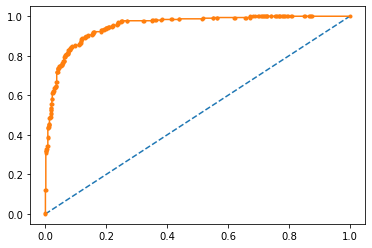

In [167]:
# AUC and ROC for the training data

# predict probabilities
probs = gbcl_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot


AUC: 0.899


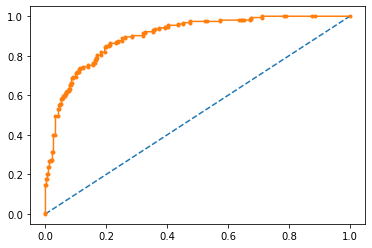

In [168]:
# AUC and ROC for the test data

# predict probabilities
probs = gbcl_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# GRID SEARCH_CV

In [169]:
param_grid = {
    'min_samples_split' : [10,15],
    'min_samples_leaf':[3,5],
    'max_depth':[10],
    'random_state' : [0]
}
RFCL_model=RandomForestClassifier()


In [170]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)


In [171]:
grid_search.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [10, 15], 'random_state': [0]})

In [172]:
grid_search.best_estimator_


RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=15,
                       random_state=0)

In [173]:
RF_model=grid_search.best_estimator_


In [174]:
RF_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=15,
                       random_state=0)

In [175]:
y_train_predict_RF = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict_RF))
print( classification_report(y_train, y_train_predict_RF))


0.8727615457115928
[[707  47]
 [ 88 219]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       754
           1       0.82      0.71      0.76       307

    accuracy                           0.87      1061
   macro avg       0.86      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061



In [176]:
y_test_predict_RF = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict_RF))
print( classification_report(y_test, y_test_predict_RF))

0.8267543859649122
[[277  26]
 [ 53 100]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       303
           1       0.79      0.65      0.72       153

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456



AUC: 0.943


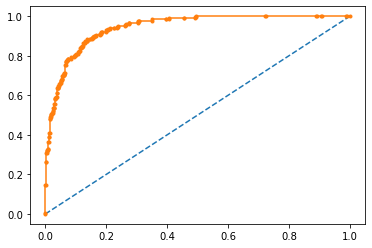

In [177]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.896


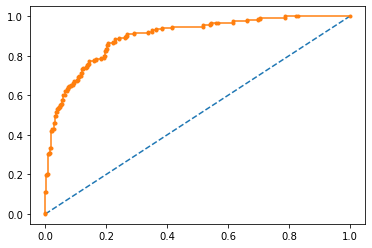

In [178]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [179]:
LogisticRegression()


LogisticRegression()

In [180]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.000001],
     'max_iter':[100,150]}

In [181]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 20,n_jobs=-1,scoring='f1')

In [182]:
grid_search.fit(X_train, y_train)

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y 

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarn

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=20, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'max_iter': [100, 150], 'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs'], 'tol': [1e-06]},
             scoring='f1')

In [183]:
best_model = grid_search.best_estimator_

In [184]:
grid_search.best_estimator_

LogisticRegression(random_state=1, tol=1e-06)

In [185]:
best_model.fit(X_train,y_train)

LogisticRegression(random_state=1, tol=1e-06)

In [186]:
print(best_model.predict(X_train))
print(best_model.predict(X_test))

[1 0 0 ... 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1
 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 0]


In [187]:
best_model.score(X_train,y_train)

0.8350612629594723

In [188]:
best_model.score(X_test,y_test)

0.8267543859649122

In [189]:
print(confusion_matrix(best_model.predict(X_train),y_train))


[[686 107]
 [ 68 200]]


In [190]:
print(classification_report(best_model.predict(X_train),y_train))


              precision    recall  f1-score   support

           0       0.91      0.87      0.89       793
           1       0.65      0.75      0.70       268

    accuracy                           0.84      1061
   macro avg       0.78      0.81      0.79      1061
weighted avg       0.84      0.84      0.84      1061



In [191]:
print(confusion_matrix(best_model.predict(X_test),y_test))


[[267  43]
 [ 36 110]]


In [192]:
print(classification_report(best_model.predict(X_test),y_test))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       310
           1       0.72      0.75      0.74       146

    accuracy                           0.83       456
   macro avg       0.80      0.81      0.80       456
weighted avg       0.83      0.83      0.83       456

